In [3]:
import pandas as pd
import numpy as np
from pathlib import Path
%matplotlib inline

In [4]:
# ANALYZING RETURN METRICS
# Quantitative analysis involves evaluating the success or failure of an investment.
# RATE OF RETURN: The percentage that the investment has gained or lost versus its initial cost.
# The rate of return is one of the key calculations to evaluate the analysis.
# Rate of return is a fundamental calculation in the fintech sector and in the financial sector as a whole.
# In this lesson, you'll use financial data and the Pandas library to calculate the following metrics:
    # 1. RETURN ON INVESTMENT (ROI): A rate-of-return calculation that compares the initial price or value of an asset to it's current price or value.
    # 2. DAILY RETURNS: A rate-of-return calculation that compares the current value of a stock to its initial value, such as the closing price today and the initial closing price the previous day.
    # 3. CUMULATIVE RETURNS: The sum of all the daily return calculations over a specified time period.    

In [5]:
# CALCULATING RETURN ON INVESTMENT
# The ROI is a percentage calculation that compares the current value of an investment to its initial cost.
# This calcualtion indicates a gain or loss.
# People use ROI calculations to compare the performance of an investment to one of several measures:
    # 1. The performance estimate that the initial plan for investment laid out.
    # 2. The performance of a similar investment over a competing time period.
    # 3. The performance of a benchmark, such as a sector index, such as tech or biotech, or a full market index, such as the S&P 500.
# With ROI, both quantitative financial analysts and investors can determine the success or failure of an investment.
# This helps them make more informed decisions about future investments.

In [10]:
# CALCULATE ROI
# To calculate ROI, we use the formula: r = (Pt - P0) / P0
    # `r`: Return on Investment
    # `Pt`: Initial Price
# We subtract the initial cost of the investment from the current value of the same investment.
# We then divide this amount by the initial cost of the investment; ROI being the result.
# We multiply the ROI by 100 to get the return percentage of the investment:

# Current and initial investment values of the investment.
initial_investment_value = 100
current_investment_value = 155

# ROI CALCULATION
return_on_investment = (current_investment_value - initial_investment_value) / initial_investment_value

# Convert the ROI into a percentage
roi_pct = return_on_investment * 100

# Print the results
print(f"The ROI for an initial investment of ${initial_investment_value}, now priced at ${current_investment_value}, yields an ROI of {return_on_investment} or {roi_pct: .2f}%.")

The ROI for an initial investment of $100, now priced at $155, yields an ROI of 0.55 or  55.00%.


In [14]:
# CALCULATE DAILY RETURNS
# Let's apply this formula to an example using the S&P 500

# Establishing the current and previous closing prices of the S&P 500
spx_current_close = 1884.66
spx_prior_close = 1881.14

# Daily Return Calculation
daily_return = ((spx_current_close - spx_prior_close)/spx_prior_close)

# Convert the daily return calculation into a percentage
daily_return_pct = daily_return * 100

# Print the result
print(f"The daily return for the S&P 500 was {daily_return:.5f} or {daily_return_pct:.2f}%." )

# As you can see, the calculation for the daily return is similar to the calculation for ROI.
# Both are rate-of-return calculations, but the focus on different time periods.
# One calculates the return over the duration of the investment, the other calculates the return over a period of one day.
# Calculating the daily returns for an investment is a routine task for quantitative financial analysts.
# However, the process becomes tedious because they need to do it every day for every asset.
# Luckily, Pandas has functions that simplify and automate this task.

The daily return for the S&P 500 was 0.00187 or 0.19%.


In [15]:
# THE SHIFT FUNCTION
# Besides calculating a daily return over several days daily, an analyst may also have to calculate in weekly, monthly, or yearly time frames.
# To midigate the grunt work, Pandas has a function that makes this task more efficient.
# The `shift` function allows you to define the length of the period you want to associate the return calculation with.
# For example, `shift(1)` streamlines the process of daily return calculations by shifting the prices by one time period.
# Similarly, `shift(5)` (5 business days) applies to the return calculations for a week, and `shift(20)` for 4 weeks.
# To ease the process of calculating returns over a one-year period, we use `shift(252)`. One year has 252 trading days.

In [24]:
# APPLY THE SHIFT FUNCTION
# Read the csv in a DataFrame
sp500_df = pd.read_csv(
    Path('sp500_close.csv'),
    index_col = 'Date',
    parse_dates = True,
    infer_datetime_format = True
)
# Use the `shift()` function with a parameter of 1 to shift every element in the `Adj Close` column:
# sp500_df['Shift_1'] = sp500_df.shift(1)
sp500_df.head()

# Let's break down this code:
    # 1. We create a DataFrame that has the `Adj Close` prices of the S&P 500 over the series of days.
    # 2. We create a new column, named `Shift_1`, in the DataFrame.
        # - This column shifts all the elements in the `Adj Close` series down by a specified number of days.
        # - A parameter in the `shift()` function specifies this number.
        # - This particular code shifts all the elements by one day.

,Adj Close
Date,
2014-05-02,1881.140015
2014-05-05,1884.660034
2014-05-06,1867.719971
2014-05-07,1878.209961
2014-05-08,1875.630005


In [26]:
# Additionally, as you can see, no element exists in the shift down to the first spot, hence the `NaN`.
# As analysts, we don't want to create a new column in every DataFrame where we need to calculate a return.
# We can use the `shift(1)` function to access the closing price of the previous day inside a formula, like the one to calculate the daily return.
# From there we just create a new `daily_return` DataFrame that has the daily rate-of-return calculation for each date in `sp500_df`:

# Review the S&P 500 daily price DataFrame:
display(sp500_df.head())

# Create the daily_returns DataFrame from the S&P 500 prices using the `shift(1)` function:
daily_returns = (sp500_df - sp500_df.shift(1)) / sp500_df.shift(1)

# Review the daily_returns DataFrame:
display(daily_returns.head())

,Adj Close
Date,
2014-05-02,1881.140015
2014-05-05,1884.660034
2014-05-06,1867.719971
2014-05-07,1878.209961
2014-05-08,1875.630005


,Adj Close
Date,
2014-05-02,NaN
2014-05-05,0.001871
2014-05-06,-0.008988
2014-05-07,0.005616
2014-05-08,-0.001374


In [32]:
# SKILL DRILL: USE THE FOLLOWING PRICE INFO AND `SHIFT(1)` TO GENERATE A DATAFRAME OF DAILY RETURNS:
stock_abc = pd.DataFrame({'close':[11.25, 11.98, 10.74, 11.16, 12.35, 12.87, 13.03, 13.14, 13.37, 12.99]})

# Review the DataFrame:
display(stock_abc.head())

# Use the `shift(1)` function to create a new DataFrame called abc_daily_returns:
abc_daily_returns = (stock_abc - stock_abc.shift(1)) / stock_abc.shift(1)

# Review the abc_daily_returns DataFrame:
display(abc_daily_returns.head(10))

# Now use the same formula to find the weekly return value, a period of 5 days:
abc_weekly_returns = (stock_abc - stock_abc.shift(5)) / stock_abc.shift(5)

# Review the abc_weekly_returns DataFrame:
display(abc_weekly_returns.head(10))

,close
0,11.25
1,11.98
2,10.74
3,11.16
4,12.35


,close
0,NaN
1,0.064889
2,-0.103506
3,0.039106
4,0.106631
5,0.042105
6,0.012432
7,0.008442
8,0.017504
9,-0.028422


,close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
5,0.144000
6,0.087646
7,0.223464
8,0.198029
9,0.051822


In [33]:
# The `shift` function gives us the flexibility to adjust the time periods that are associated with the return calculations.
# Allowing us to specify daily, weekly, monthly, quarterly, or even yearly periods.
# Daily return calculations make up a routine part of financial analysis. 
# The Pandas `shift(1)` function eases the generation of daily return values, but requires creating an equation.
# Fortunately, Pandas simplifies the process of creating daily returns further with the `pct_change` function.

In [34]:
# THE `PCT_CHANGE()` FUNCTION
# With the `shift()` function, you need to specify the number `1` to access the element that's just before the current one.
# However, by default, the Pandas `pct_change()` function calculates the percentage of change between the current element and the one that's just before it in a Series, or column.
# Though both `shift()` and `pct_change()` functions operate the same, understanding the former will make understanding the latter easier.

In [41]:
# APPLYING THE `PCT_CHANGE()` FUNCTION
# For time series data, like the daily closing prices, you can use the `pct_change()` to quickly generate a DataFrame consisting of a Series of daily returns:

# Review the S&P 500 daily price DataFrame:
display(sp500_df.head())

# Calculate the daily return using the `pct_change()` function:
daily_returns_pct = sp500_df.pct_change()

# Review the daily_returns_pct DataFrame:
display(daily_returns_pct.head())

,Adj Close
Date,
2014-05-02,1881.140015
2014-05-05,1884.660034
2014-05-06,1867.719971
2014-05-07,1878.209961
2014-05-08,1875.630005


,Adj Close
Date,
2014-05-02,NaN
2014-05-05,0.001871
2014-05-06,-0.008988
2014-05-07,0.005616
2014-05-08,-0.001374


In [44]:
# SKILL DRILL 
stock_def = pd.DataFrame({'close':[11.25, 11.98, 10.74, 11.16, 12.35, 12.87, 13.03]})

# Review the `stock_def` DataFrame:
display(stock_def.head())

# Create a DataFrame called stock_daily_pct, using the `pct_change()` function:
stock_daily_pct = stock_def.pct_change()

# Review the stock_daily_pct DataFrame:
display(stock_daily_pct.head())

,close
0,11.25
1,11.98
2,10.74
3,11.16
4,12.35


,close
0,NaN
1,0.064889
2,-0.103506
3,0.039106
4,0.106631


In [47]:
# With this daily returns data, we can evaluate and plot the information for any number of periods.
# Using the `loc` function, we select a one-year period from May 1, 2018 to May 1, 2019.
# We also select a 3 year period from May 1, 2016 to May 1, 2019
# We'll use the `describe()` function to get the summary statistics for both periods:

# Calculating daily return for a year period:
daily_return_year = daily_returns.loc['2018-05-01':'2019-05-01']

# Display 1 year return statistics:
display(daily_return_year.describe())

# Calculate the 3 year daily return:
daily_return_3y = daily_returns.loc['2016-05-01':'2019-05-01']

# Display the 3 year return statistics:
display(daily_return_3y.describe())

,Adj Close
count,252.000000
mean,0.000437
std,0.009392
min,-0.032864
25%,-0.002966
50%,0.000735
75%,0.004895
max,0.049594


,Adj Close
count,755.000000
mean,0.000491
std,0.007848
min,-0.040979
25%,-0.002223
50%,0.000553
75%,0.004087
max,0.049594


<AxesSubplot:xlabel='Date'>

<AxesSubplot:xlabel='Date'>

<AxesSubplot:xlabel='Date'>

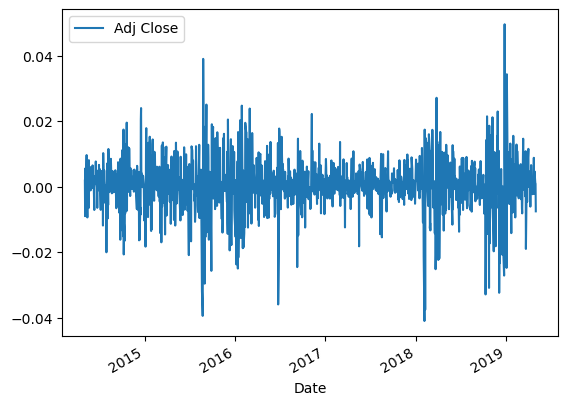

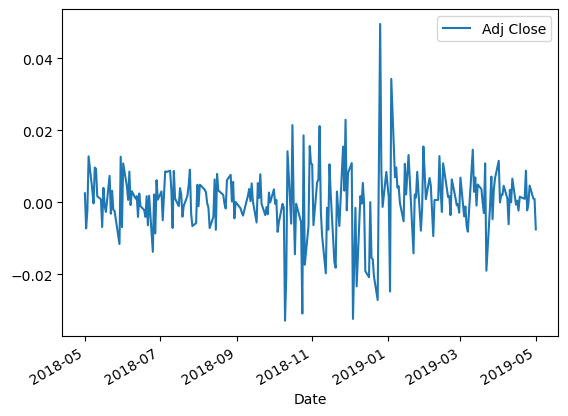

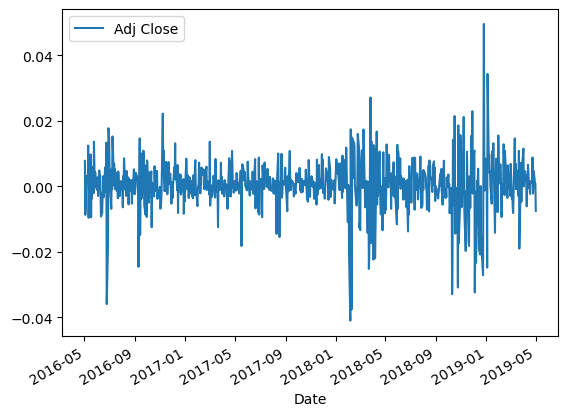

In [51]:
# PLOTTING DAILY RETURNS
# With the `plot()` function, we can create informative visualizations for DataFrames.
# By plotting a daily returns DataFrame, we can see the overall variability in the daily return data over the time period.

# Create a plot for the daily returns:
display(daily_returns.plot())[11.25, 11.98, 10.74, 11.16, 12.35, 12.87, 13.03]})

# Create a plot for the daily returns for one year:
display(daily_return_year.plot())

# Create a plot for the daily returns for three years:
display(daily_return_3y.plot())